In [1]:
from langchain_openai import OpenAI,ChatOpenAI

llm=ChatOpenAI(
  model="qwen2.5-coder-1.5b-instruct",
  openai_api_key="EMPTY",
  base_url="http://127.0.0.1:1234/v1",
  temperature=0.7
)

In [2]:
from langchain_community.utilities import SearxSearchWrapper
from langchain.agents import Tool

search=SearxSearchWrapper(
    searx_host="http://127.0.0.1:6688",
    k=5,
)

searchTool=Tool(
    name="Search",
    func=search.run,
    description="输入搜索内容，使用SearXNG进行搜索"
)

In [3]:
searchTool.invoke("房东的猫")

"The Landlord's Cat (房東的貓). CHNAsian, Chinese Folk. 109,200 monthly listeners. 58.7K followers. 48.5K subscribers. 20 fans. The Landlord's Cat (房東的\xa0...\n\nExplore 房东的猫's biography, discography, and artist credits. Shop rare vinyl records, top albums, and more on Discogs.\n\nAug 3, 2021 ... Stream 房东的猫 - New Boy by terencetzc on desktop and mobile. Play over 320 million tracks for free on SoundCloud.\n\n冥王星被开除的那一刻(电影《念念相忘》插曲) - SingleThe Landlord's Cats · Single. 2023. 短叹(房东的猫「世界青年」2023巡回演唱会上海站) - SingleThe Landlord's\xa0...\n\nJul 7, 2024 ... Fang Dong De Mao (房东的猫) – My Dearest Passerby | As Beautiful As You《你比星光美丽》OST Lyrics Eng/Indo."

In [4]:
promptTemplate = """尽可能的帮助用户回答任何问题。

您可以使用以下工具来帮忙解决问题，如果已经知道了答案，也可以直接回答：

searxng_search : searxng_search(query) -> 输入搜索内容，使用 SearXNG 进行搜索。

回复格式说明
--------------------------

回复我时，请以前以下两种格式之一输出回复：

选项 1: 如果您希望人类使用工具，请使用此选项。
采用以下JSON模式格式化的回复内容，回复的格式里不要有注释内容：

```json
{{
    "reason": string, \\ 叙述使用工具的原因
    "action": "searxng_search", \\ 要使用的工具。必须是 searxng_search
    "action_input": string \\ 工具的输入
}}
```

选项2：如果您认为您已经有答案或者已经通过使用工具找到了答案，想直接对人类做出反应，请使用此选项。采用以下JSON模式格式化的回复内容：

```json
{{
  "action": "Final Answer",
  "answer": string \\ 最终答复问题的答案放到这里！
}}
````
用户的输入 
-------------------- 
这是用户的输入（请记住通过单个选项，以JSON模式格式化的回复内容，不要回复其他内容）：

{input}
"""

In [5]:
from langchain.prompts import ChatPromptTemplate,MessagesPlaceholder

prompt=ChatPromptTemplate.from_messages(
    [
      (
          "system",
          "你是非常强大的助手，你可以使用各种工具来完成人类交给的问题和任务",
      ),
      (
        "user",
        promptTemplate,
      )
    ]
)

In [6]:
from langchain_core.output_parsers import StrOutputParser

output_parser=StrOutputParser()

chain1=prompt | llm 

In [7]:
for chunk in chain1.stream("蔡徐坤的最新动态"):
    print(chunk,end="",flush=True)

content='{\n' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920d-63e1fc9200f1'content='   ' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920d-63e1fc9200f1'content=' "' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920d-63e1fc9200f1'content='reason' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920d-63e1fc9200f1'content='":' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920d-63e1fc9200f1'content=' "' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920d-63e1fc9200f1'content='C' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920d-63e1fc9200f1'content='ai' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920d-63e1fc9200f1'content=' Xu' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920d-63e1fc9200f1'content='坤' additional_kwargs={} response_metadata={} id='run--019bc1a9-92ee-7cc3-920

In [8]:
promptTemplate2="""使用浏览器获取的搜索内容：
---------------------------
{observation}
---------------------------
请根据浏览器的响应，回答下面的问题：

{input}"""

prompt2=ChatPromptTemplate.from_messages(
    [
      (
          "system",
          "你是非常强大的助手，你可以使用各种工具来完成人类交给的问题和任务",
      ),
      (
        "user",
        promptTemplate2,
      )
    ]
)

In [9]:
chain2=prompt2 | llm 

In [10]:
from langgraph.graph import END,MessageGraph

graph=MessageGraph()

graph.add_node("chain",chain1)
graph.add_edge("chain",END)

graph.set_entry_point("chain")

runnable1=graph.compile()

C:\Users\86151\AppData\Local\Temp\ipykernel_20096\2778475488.py:3: LangGraphDeprecatedSinceV10: MessageGraph is deprecated in LangGraph v1.0.0, to be removed in v2.0.0. Please use StateGraph with a `messages` key instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  graph=MessageGraph()


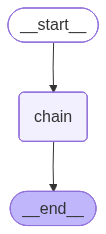

In [11]:
from IPython.display import Image, display

display(Image(runnable1.get_graph().draw_mermaid_png()))

In [12]:
from langchain_core.messages import HumanMessage

runnable1.invoke(HumanMessage("小米su7的发布时间"))

[HumanMessage(content='小米su7的发布时间', additional_kwargs={}, response_metadata={}, id='5a2716a2-8d27-4580-ab29-46d866ef75c9'),
 AIMessage(content='```json\n{\n    "reason": "我需要使用 SearXNG 进行搜索以找到小米SU7的发布时间。",\n    "action": "searxng_search",\n    "action_input": "xiaomi su7 release date"\n}\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 342, 'total_tokens': 396, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen2.5-coder-1.5b-instruct', 'system_fingerprint': 'qwen2.5-coder-1.5b-instruct', 'id': 'chatcmpl-ux7k4ra3ipnfca3di927ya', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--019bc1a9-a0ed-7d62-935d-43044bc810be-0', usage_metadata={'input_tokens': 342, 'output_tokens': 54, 'total_tokens': 396, 'input_token_details': {}, 'output_token_details': {}})]

In [13]:
def process(state):
    print(state)
    content=state[-1].content
    return {"input":state[0].content,"observation":content}
  
chain2=process | prompt2 | llm 

In [14]:
from langgraph.graph import END,MessageGraph
from langchain_core.utils.json import parse_json_markdown

graph=MessageGraph()

def tool(state):
    print(state)
    content=state[-1].content
    response=parse_json_markdown(content)
    
    result=searchTool.invoke(response["action_input"])
    return HumanMessage(result)
  
graph.add_node("chain1",chain1)
graph.add_node("tool",tool)
graph.add_node("chain2",chain2)

#设置开始
graph.set_entry_point("chain1")

#设置条件边
def route(state):
    print(state)
    content=state[-1].content
    response=parse_json_markdown(content)
    if(response['action']=="Final Answer"):
        return END
    else:
        return "tool"

graph.add_conditional_edges("chain1",route,{
    "tool":"tool",
    "end":END
})

graph.add_edge("tool","chain2")
graph.add_edge("tool",END)

runnable2=graph.compile()

C:\Users\86151\AppData\Local\Temp\ipykernel_20096\2708713559.py:4: LangGraphDeprecatedSinceV10: MessageGraph is deprecated in LangGraph v1.0.0, to be removed in v2.0.0. Please use StateGraph with a `messages` key instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  graph=MessageGraph()


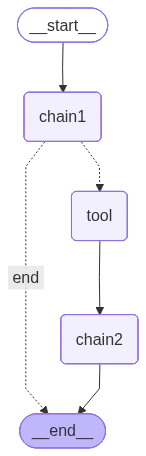

In [15]:
display(Image(runnable2.get_graph().draw_mermaid_png()))

In [16]:
runnable2.invoke(HumanMessage("小米su7的发布时间"))

[HumanMessage(content='小米su7的发布时间', additional_kwargs={}, response_metadata={}, id='a4e33e27-609c-4190-aff2-2ed270051376'), AIMessage(content='```json\n{\n    "reason": "用户提问了小米SU7的发布时间",\n    "action": "searxng_search",\n    "action_input": "小米SU7"\n}\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 341, 'total_tokens': 382, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen2.5-coder-1.5b-instruct', 'system_fingerprint': 'qwen2.5-coder-1.5b-instruct', 'id': 'chatcmpl-xq6420pzyg82z92uq9m8q', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--019bc1a9-abf5-7e32-98a7-c750cec409f5-0', usage_metadata={'input_tokens': 341, 'output_tokens': 41, 'total_tokens': 382, 'input_token_details': {}, 'output_token_details': {}})]
[HumanMessage(content='小米su7的发布时间', additional_kwargs={}, response_metadata={}, id='a4e33e27-609c-4190-aff2-2ed270051376'), AIMessage(content='

[HumanMessage(content='小米su7的发布时间', additional_kwargs={}, response_metadata={}, id='a4e33e27-609c-4190-aff2-2ed270051376'),
 AIMessage(content='```json\n{\n    "reason": "用户提问了小米SU7的发布时间",\n    "action": "searxng_search",\n    "action_input": "小米SU7"\n}\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 341, 'total_tokens': 382, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen2.5-coder-1.5b-instruct', 'system_fingerprint': 'qwen2.5-coder-1.5b-instruct', 'id': 'chatcmpl-xq6420pzyg82z92uq9m8q', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--019bc1a9-abf5-7e32-98a7-c750cec409f5-0', usage_metadata={'input_tokens': 341, 'output_tokens': 41, 'total_tokens': 382, 'input_token_details': {}, 'output_token_details': {}}),
 HumanMessage(content="Xiaomi SU7 is equipped with a 16.1 inch, 3K ultra-clear central control screen, a large 56-inch HUD, and a rotating das